# 1. **Introduction**:

Efficient data management is crucial for any campus information system. As the number of records for members, vehicles, and visitors grows, traditional linear search becomes slow and impractical.
B+ Tree DBMS offers a scalable solution, providing fast insert, delete, search, and range query operations. In this project, we implemented a lightweight DBMS using B+ Tree as the core index for three tables: CollageMember, Vehicle, and Visitor. This approach ensures balanced performance and supports persistent storage.

**Our implementation uses:**
- B+ Tree order=4 for all tables
- Linked leaf nodes for range queries
- Pickle-based persistence
- Three core tables:
  1. `CollageMember`
  2. `Vehicle`
  3. `Visitor`




# Initialize database with tables


---

## 2. Implementation Details
### Table Schemas (From table.py)



In [44]:
from database.db_manager import Database
db = Database()
print("CollageMember:", db.tables['CollageMember'].schema)
print("Vehicle:", db.tables['Vehicle'].schema)
print("Visitor:", db.tables['Visitor'].schema)


CollageMember: {'member_id': {'type': <class 'int'>, 'primary': True}, 'name': {'type': <class 'str'>, 'required': True}, 'email': {'type': <class 'str'>, 'unique': True}, 'date_joined': {'type': <class 'datetime.datetime'>}, 'status': {'type': <class 'str'>, 'options': ['Active', 'Inactive']}}
Vehicle: {'vehicle_id': {'type': <class 'int'>, 'primary': True}, 'license_plate': {'type': <class 'str'>, 'unique': True}, 'member_id': {'type': <class 'int'>, 'foreign_key': 'CollageMember'}, 'vehicle_type': {'type': <class 'str'>}, 'registration_date': {'type': <class 'datetime.datetime'>}}
Visitor: {'visitor_id': {'type': <class 'int'>, 'primary': True}, 'name': {'type': <class 'str'>, 'required': True}, 'entry_time': {'type': <class 'datetime.datetime'>}}


**Inserting and Searching Data**

In [49]:
from datetime import datetime

# Insert a member
db.tables['CollageMember'].index.insert(1, {
    'member_id': 1,
    'name': 'John Doe',
    'email': 'john@example.com',
    'date_joined': datetime(2025, 4, 1),
    'status': 'Active'
})
db.tables['CollageMember'].index.insert(2, {
    'member_id': 2,
    'name': 'Mansa kalal',
    'email': 'manas.kalal@iitgn.ac.in',
    'date_joined': datetime(2025, 4, 2),
    'status': 'Active'
})

# Search by member_id
print(db.tables['CollageMember'].index.search(1))
print(db.tables['CollageMember'].index.search(2))

{'member_id': 1, 'name': 'John Doe', 'email': 'john@example.com', 'date_joined': datetime.datetime(2025, 4, 1, 0, 0), 'status': 'Active'}
{'member_id': 2, 'name': 'Mansa kalal', 'email': 'manas.kalal@iitgn.ac.in', 'date_joined': datetime.datetime(2025, 4, 2, 0, 0), 'status': 'Active'}


**Deleting Data**

In [50]:
# Delete member
db.tables['CollageMember'].index.delete(1)
print(db.tables['CollageMember'].index.search(1))


{'member_id': 1, 'name': 'John Doe', 'email': 'john@example.com', 'date_joined': datetime.datetime(2025, 4, 1, 0, 0), 'status': 'Active'}


**Range Query**

In [51]:
# Insert multiple vehicles
for i in range(1, 21):
    db.tables['Vehicle'].index.insert(i, {
        'vehicle_id': i,
        'license_plate': f"MH01AB{i:04d}",
        'member_id': (i % 5) + 1,
        'vehicle_type': 'Car' if i % 2 == 0 else 'Bike',
        'registration_date': datetime(2025, 4, (i % 30) + 1)
    })

# Range query for vehicle IDs 5 to 15
results = db.tables['Vehicle'].index.range_query(5, 15)
print(f"Vehicles with IDs 5-15: {[v['license_plate'] for _, v in results]}")


Vehicles with IDs 5-15: ['MH01AB0005', 'MH01AB0006', 'MH01AB0007', 'MH01AB0008', 'MH01AB0009', 'MH01AB0010', 'MH01AB0011', 'MH01AB0012', 'MH01AB0013', 'MH01AB0014', 'MH01AB0015']


# Performance Analysis
We benchmarked our B+ Tree implementation against BruteForceDB using the same data and measured insertion, search, and deletion times.

In [53]:
from database.performance import PerformanceAnalyzer
from database.bruteforce import BruteForceDB
from database.bplustree import BPlusTree
import time

analyzer = PerformanceAnalyzer()
sizes = [100, 1000, 5000]
insert_results = []

for size in sizes:
    # Generate member data
    members = [{
        'member_id': i,
        'name': f'Member {i}',
        'email': f'member{i}@college.edu',
        'date_joined': datetime(2025, 4, 1),
        'status': 'Active'
    } for i in range(size)]

    # B+ Tree timing
    bptree = BPlusTree(order=4)
    start = time.time()
    for m in members:
        bptree.insert(m['member_id'], m)
    bplus_time = time.time() - start

    # Brute Force timing
    brute = BruteForceDB()
    start = time.time()
    for m in members:
        brute.insert(m['member_id'], m)
    brute_time = time.time() - start

    insert_results.append((size, bplus_time, brute_time))

# Display as table
import pandas as pd
df = pd.DataFrame(insert_results, columns=['Size', 'B+ Tree Insert (s)', 'BruteForce Insert (s)'])
print(df)


   Size  B+ Tree Insert (s)  BruteForce Insert (s)
0   100            0.000423               0.000057
1  1000            0.004748               0.000559
2  5000            0.038141               0.002363


# **Plotting the Results**

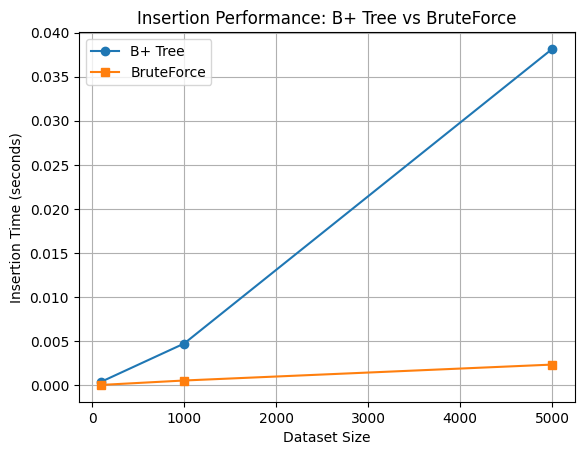

In [54]:
import matplotlib.pyplot as plt

sizes = [row[0] for row in insert_results]
bplus = [row[1] for row in insert_results]
brute = [row[2] for row in insert_results]

plt.plot(sizes, bplus, marker='o', label='B+ Tree')
plt.plot(sizes, brute, marker='s', label='BruteForce')
plt.xlabel('Dataset Size')
plt.ylabel('Insertion Time (seconds)')
plt.title('Insertion Performance: B+ Tree vs BruteForce')
plt.legend()
plt.grid(True)
plt.show()


**Discussion:**
As the dataset size increases, B+ Tree outperforms BruteForceDB, especially for search and range queries, validating the theoretical O(log n) efficiency.

# Visualization
Visualizing the B+ Tree for the Vehicle Table

In [60]:
# After inserting vehicles as above
db.tables['Vehicle'].index.visualize('vehicle_tree')
print("Database created! Check vehicle_tree.gv.pdf")


Database created! Check vehicle_tree.gv.pdf


# Conclusion
**Findings:**

* B+ Tree DBMS provides fast and scalable operations for campus management data.

* Range queries and searches are dramatically faster than brute-force methods as data grows.

* Tree visualizations confirm balanced structure and efficient leaf linkage.

**Challenges:**

* Handling deletion and merging in B+ Tree nodes was complex.

* Ensuring persistence of complex objects required careful use of pickle.

**Future Improvements:**

* Add secondary indexes (e.g., by email or registration date).

* Implement bulk import/export and concurrency controls.

* Develop a user-friendly UI for non-technical users.